# Project: Credit Card Fraud Detection

# About the dataset:

Link to hte dataset at GitHub: https://github.com/rashida048/Datasets/blob/master/fraud_data.csv

This dataset is about credit card fraud detection. It is very likely that a bank will not share its client information with a data scientist. So, the feature names won’t be available. It has a binary column that indicates if a transaction is fraudulent or not. This dataset can be used for classification models.

<h4>Steps:</h4>
<ol>
  <li>Data Analysis</li>
  <li>Feature Engineering</li>
  <li>Feature Selection</li>
  <li>Model Training</li>
  <li>Obtaining Predictions / Scoring</li>
</ol>

<b>Dependencies and versions</b>

In [1]:
# importing libraries
from platform import python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)

Python version: 3.8.8
NumPy version: 1.20.2
Pandas version: 1.2.4
SciPy version: 1.6.2


<h2>STEP 1: Data analysis</h2>

In [3]:
# importing the dataset
df = pd.read_csv("fraud_data.csv")

In [4]:
# shape
df.shape

(21693, 30)

In [5]:
# showing first five rows of the dateset
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [6]:
# showing data types
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# checking missing values
df.isnull().any(axis = 1).sum()

0

In [8]:
# checking duplicated rows
df.duplicated().sum()

143

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# checking duplicated rows
df.duplicated().sum()

0

In [11]:
# displaying the target
df['Class'].value_counts()

0    21204
1      346
Name: Class, dtype: int64

In [12]:
fraud_ratio = df['Class'].value_counts()[1] / (df['Class'].value_counts()[0] + df['Class'].value_counts()[1])
print('The dataset is imbalanced, fraudulent transactions comprise only {:.1%} of the companies'.format(fraud_ratio))

The dataset is imbalanced, fraudulent transactions comprise only 1.6% of the companies


In [13]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var != 'Class']
# number of numerical variables
len(num_vars)

29

<b>Discrete variables</b>

In [14]:
#  making a list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


<b>Continuous variables</b>

All the numerical variables are continuous

In [15]:
# making list of continuous variables
cont_vars = num_vars
print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  29


In [16]:
#continuous variables
df[cont_vars].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67


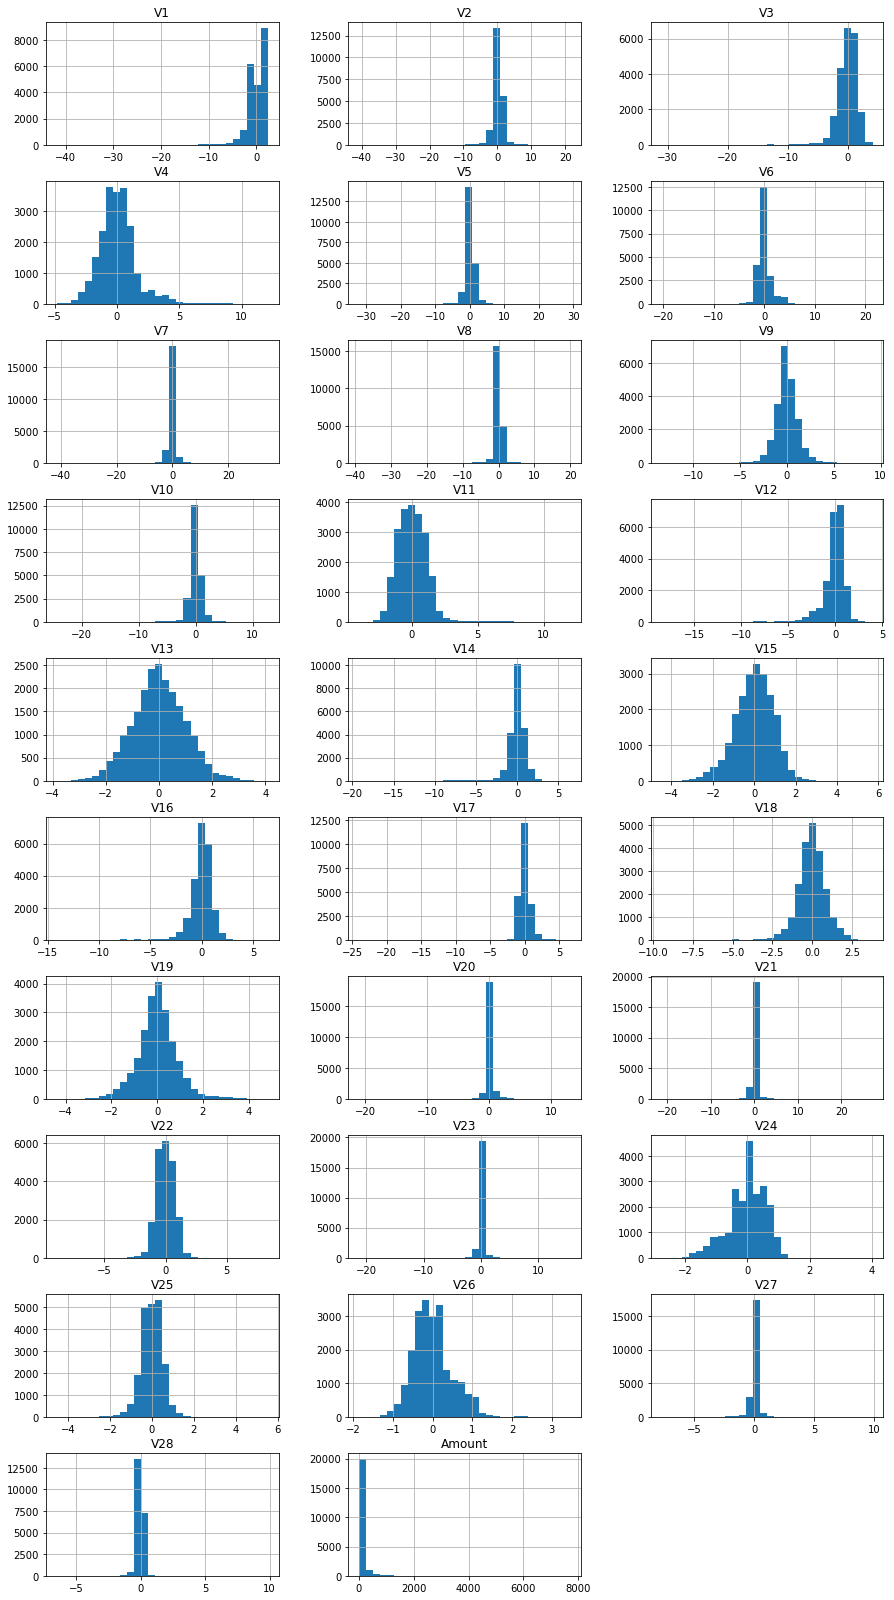

In [17]:
# plotting histograms for all continuous numerical variables
df[cont_vars].hist(bins=30, layout=(31,3) ,figsize=(15,90))
plt.show()

In [18]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

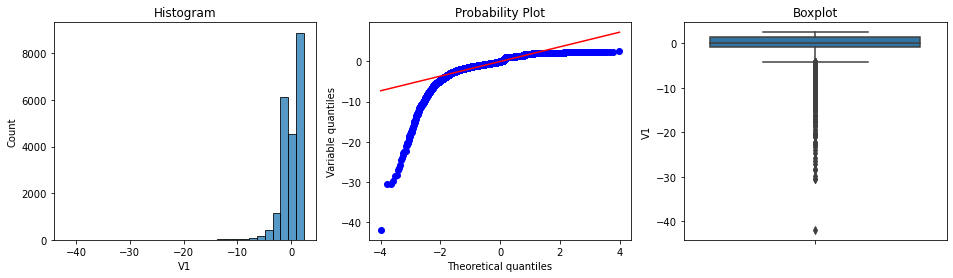

skewness of V1 is -3.82


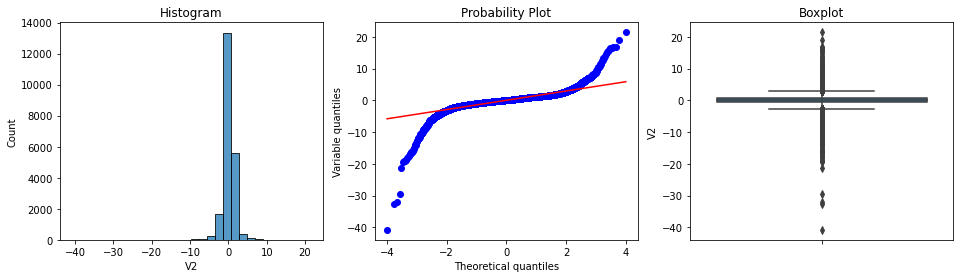

skewness of V2 is -2.46


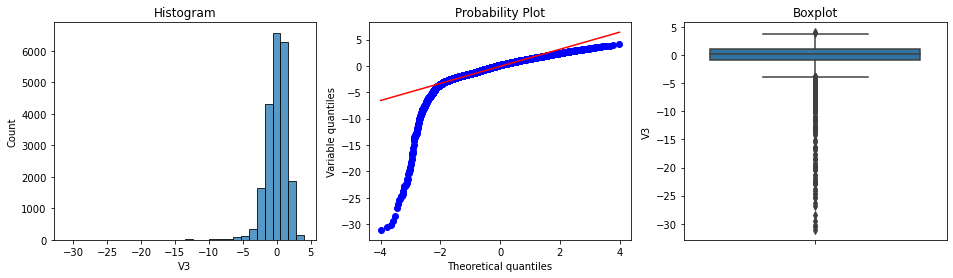

skewness of V3 is -4.42


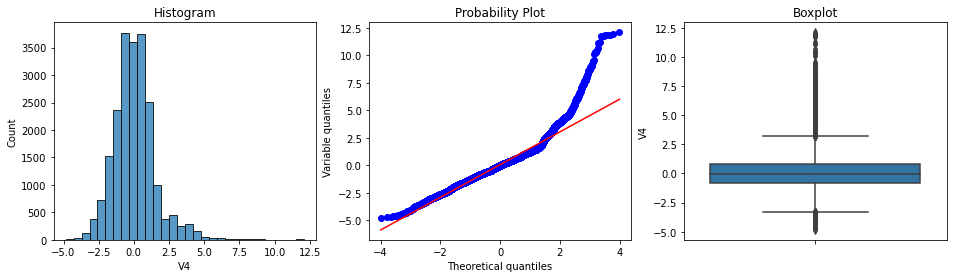

skewness of V4 is 1.19


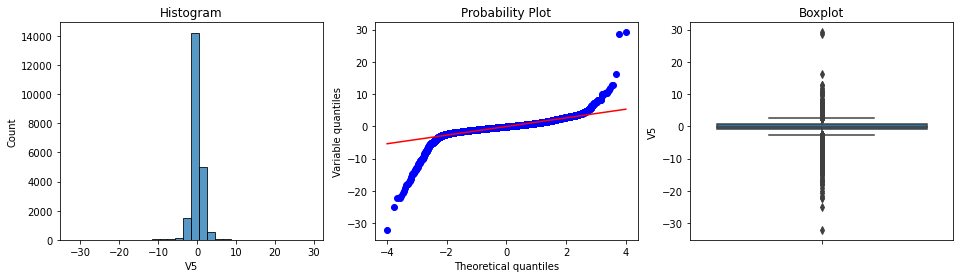

skewness of V5 is -1.91


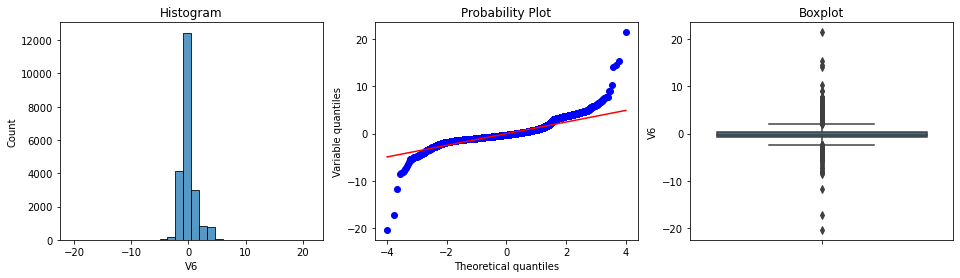

skewness of V6 is 1.28


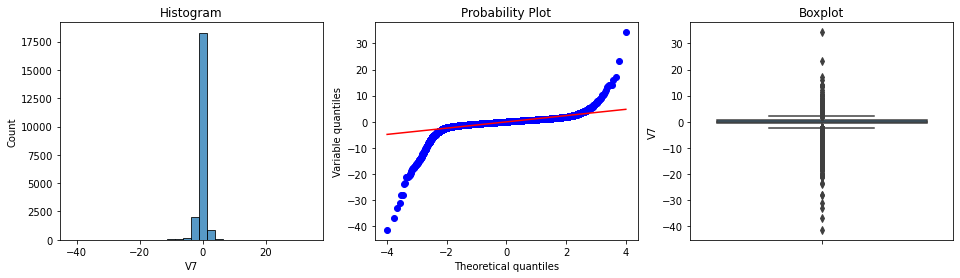

skewness of V7 is -5.30


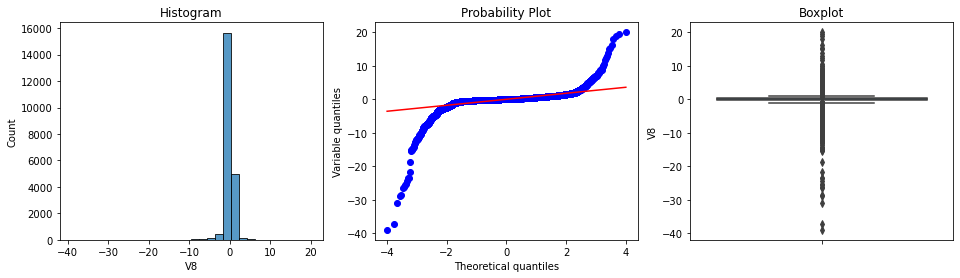

skewness of V8 is -7.25


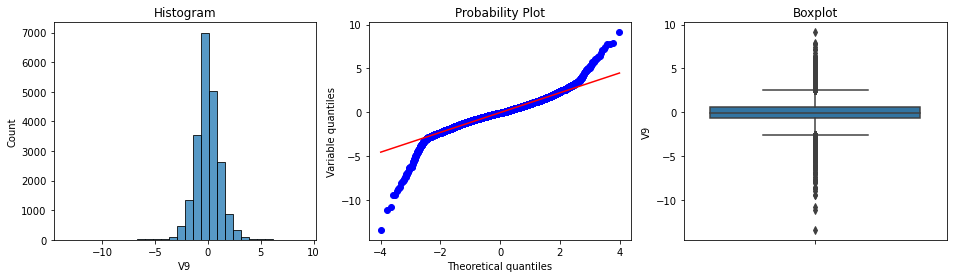

skewness of V9 is -0.24


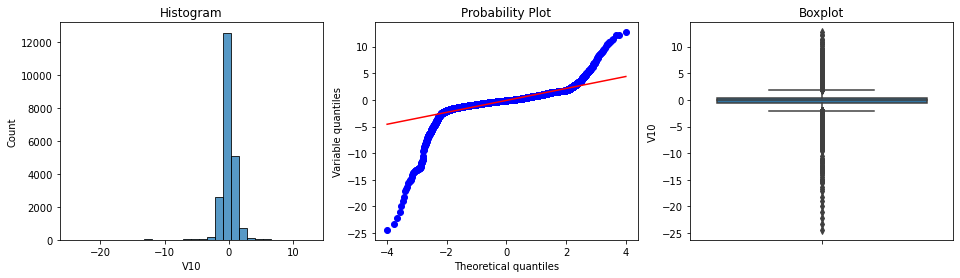

skewness of V10 is -3.34


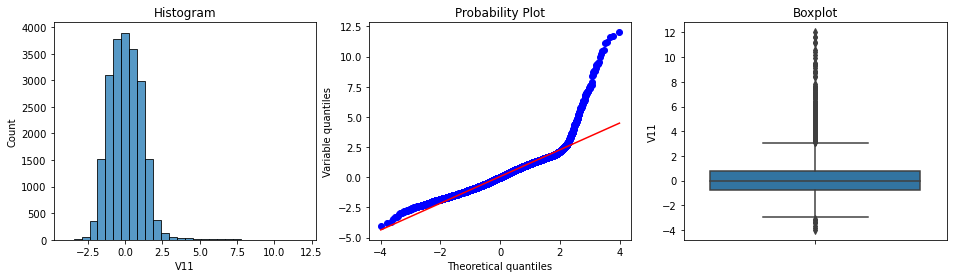

skewness of V11 is 1.40


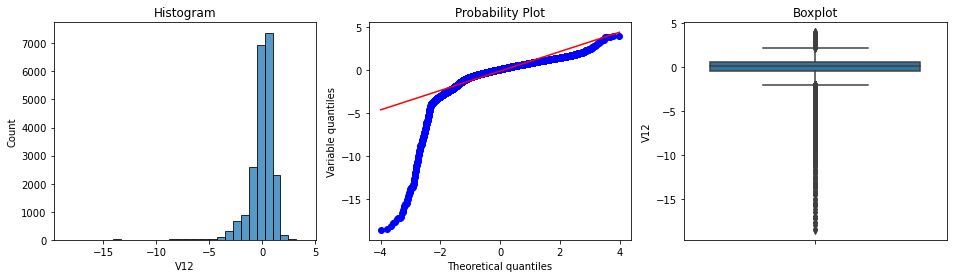

skewness of V12 is -4.69


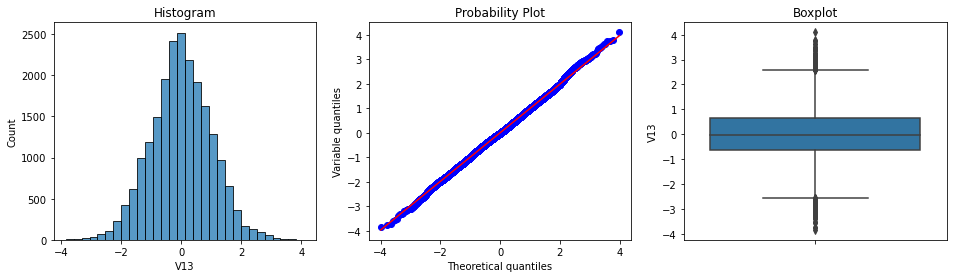

skewness of V13 is 0.03


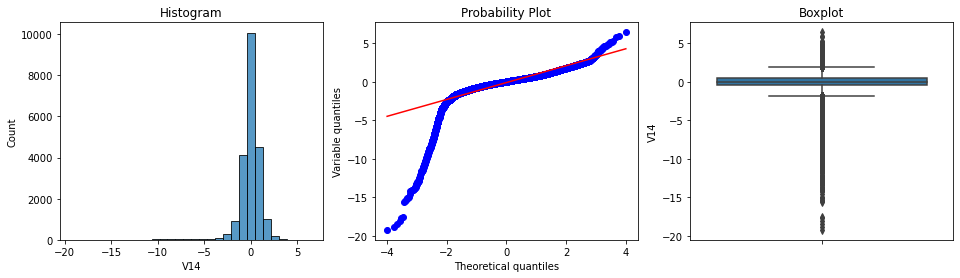

skewness of V14 is -4.68


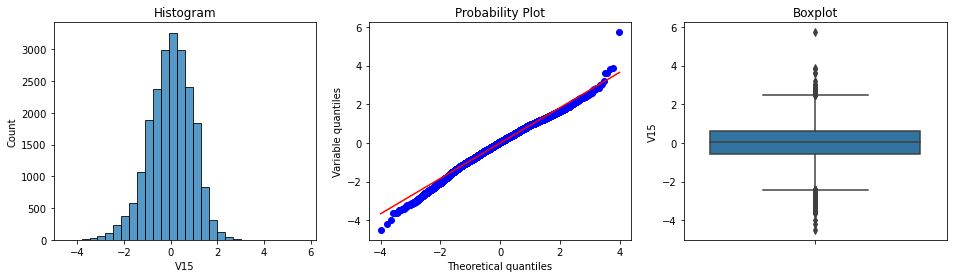

skewness of V15 is -0.32


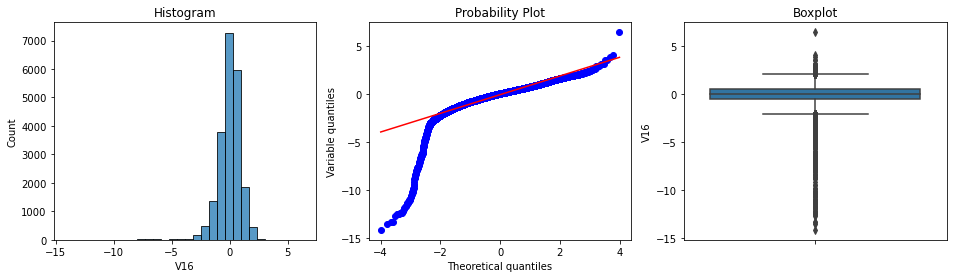

skewness of V16 is -3.47


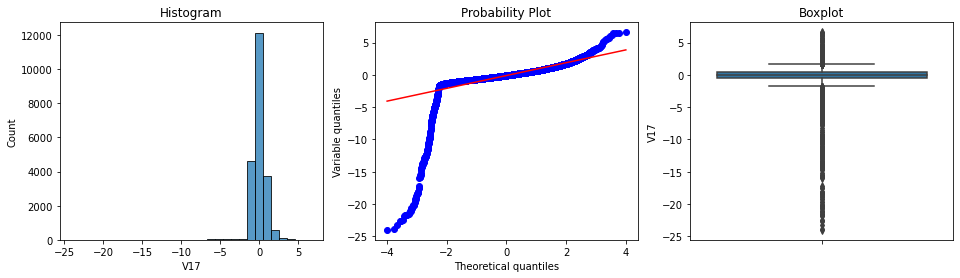

skewness of V17 is -7.93


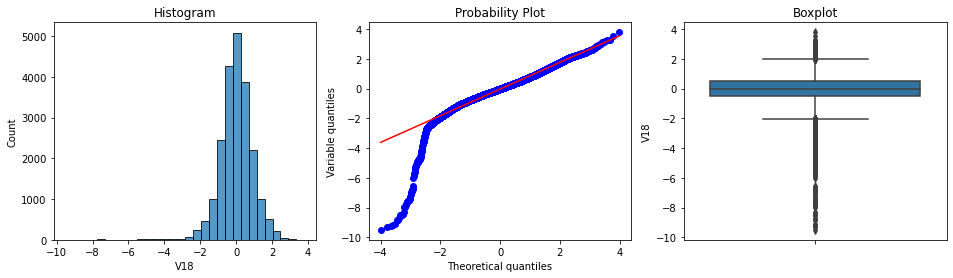

skewness of V18 is -1.47


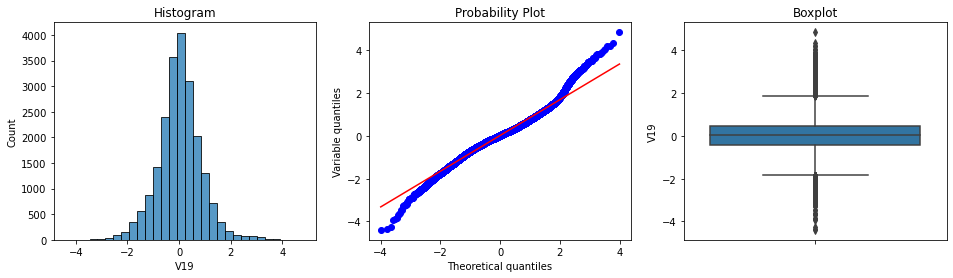

skewness of V19 is 0.17


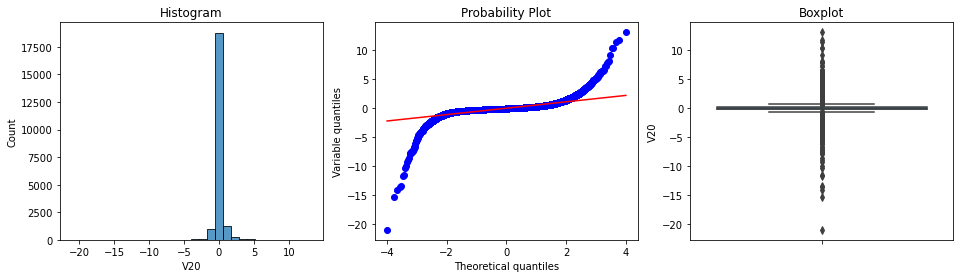

skewness of V20 is -1.81


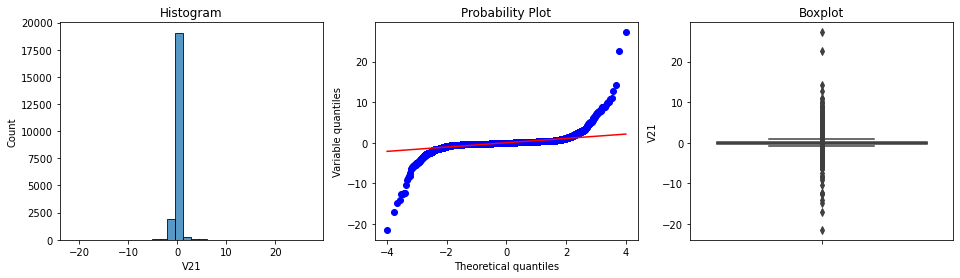

skewness of V21 is 2.42


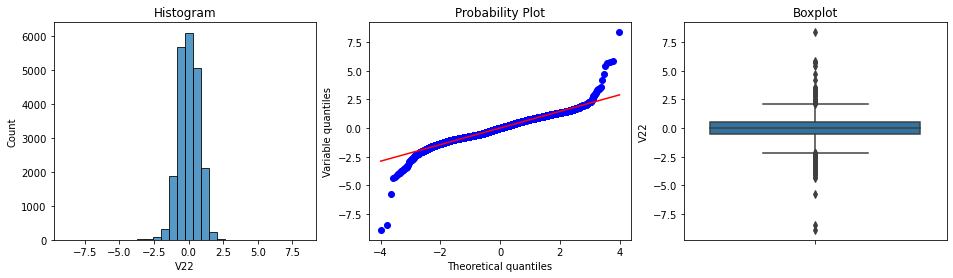

skewness of V22 is -0.12


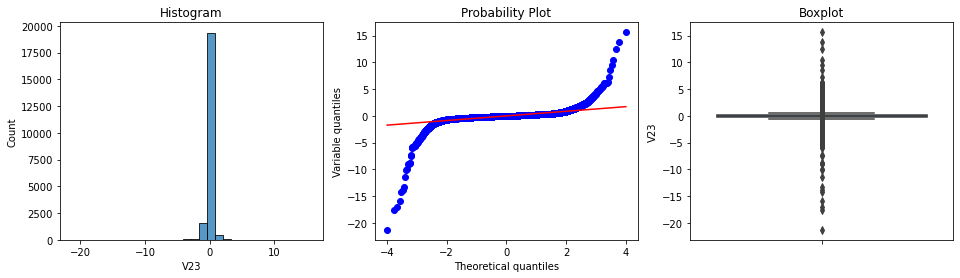

skewness of V23 is -5.05


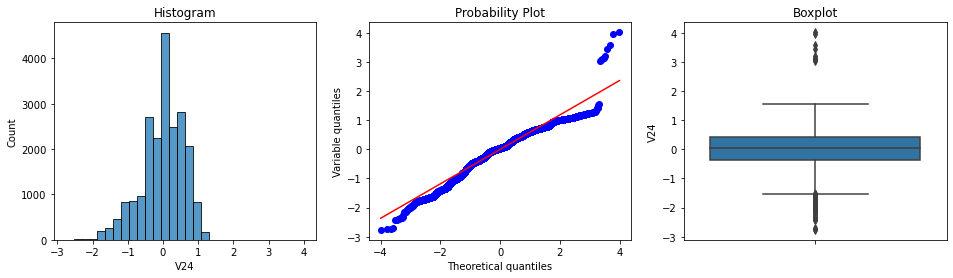

skewness of V24 is -0.55


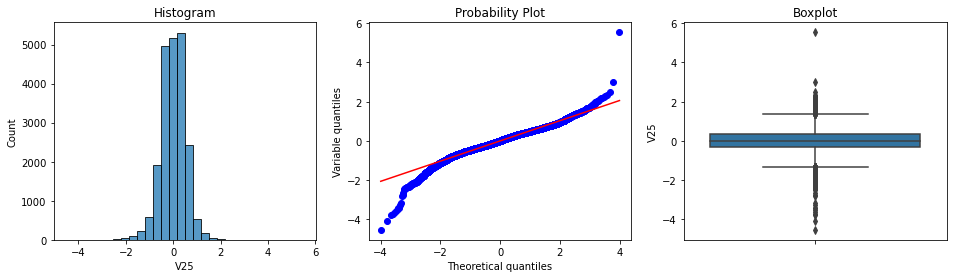

skewness of V25 is -0.42


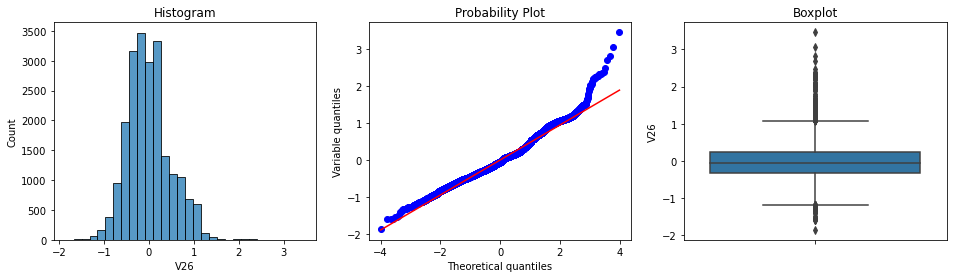

skewness of V26 is 0.55


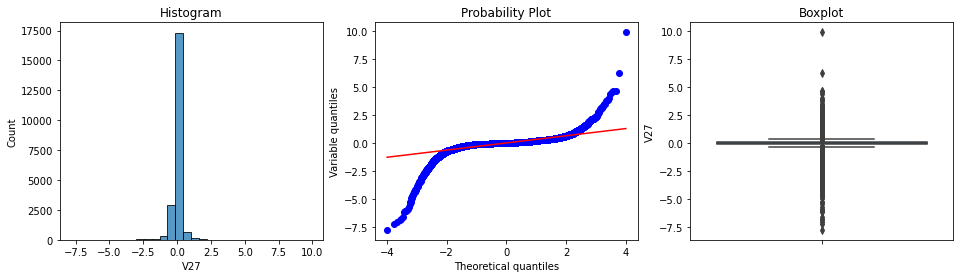

skewness of V27 is -2.86


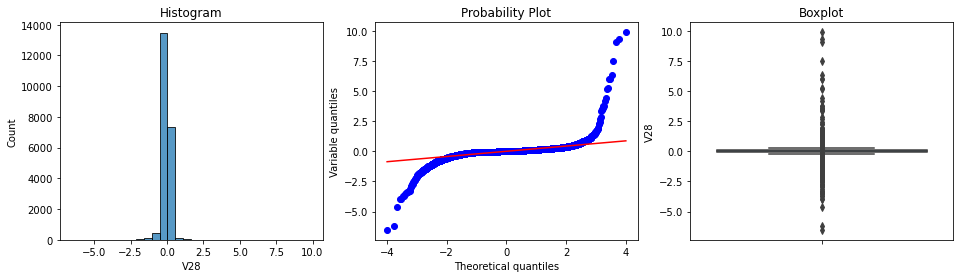

skewness of V28 is 4.60


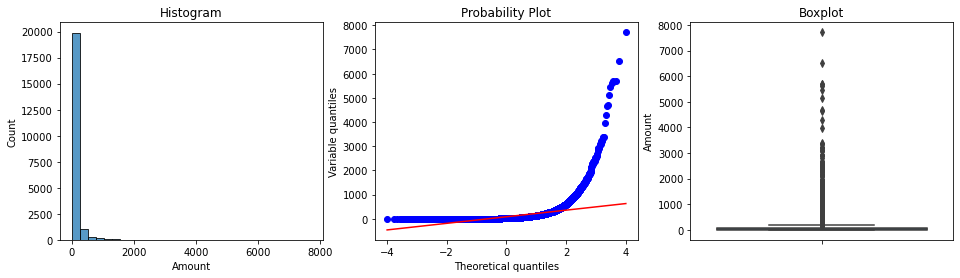

skewness of Amount is 10.72


In [19]:
# plotting the continuous variables
for variable in cont_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("skewness of", variable, "is {:.2f}".format(skewness))

<b>Yeo-Johnson transformation</b>

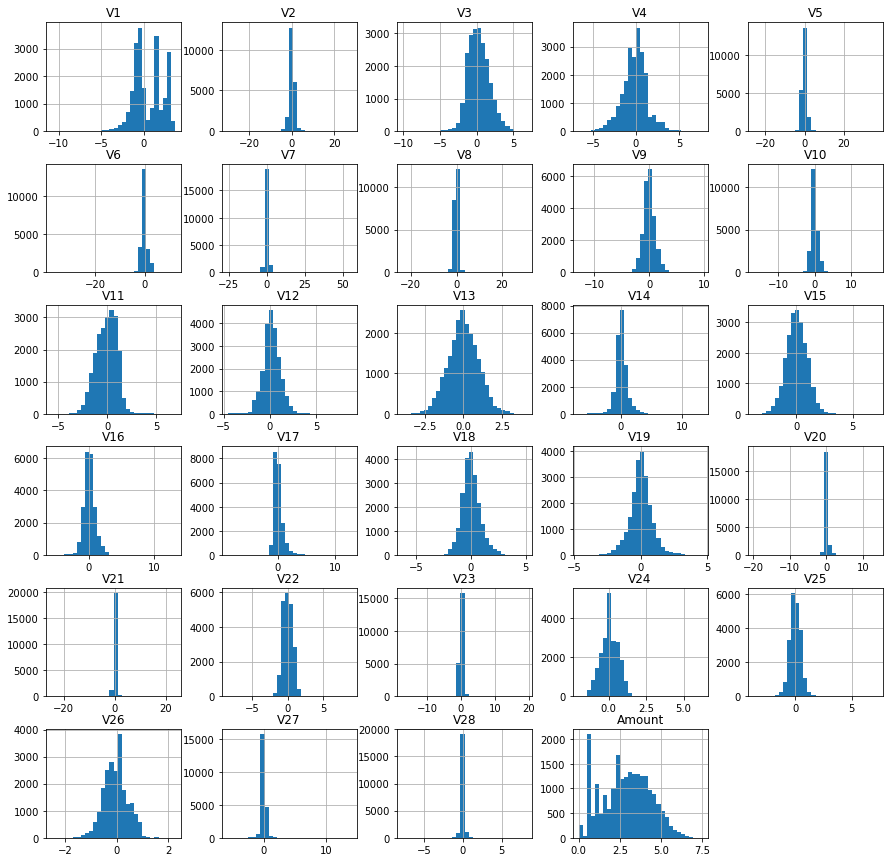

In [20]:
# Analysing the distributions of the variables after applying a Yeo-Johnson transformation

# temporary copy of the data
tmp = df.copy()

for var in cont_vars:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])

    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

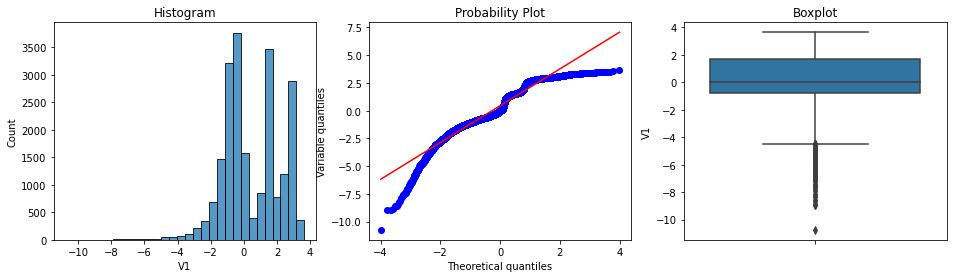

skewness of V1 is -0.22


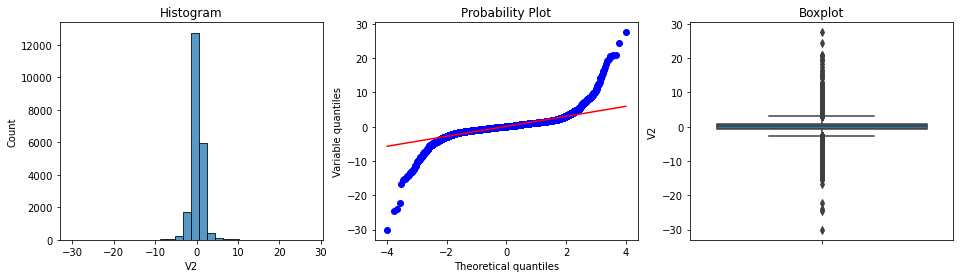

skewness of V2 is 0.29


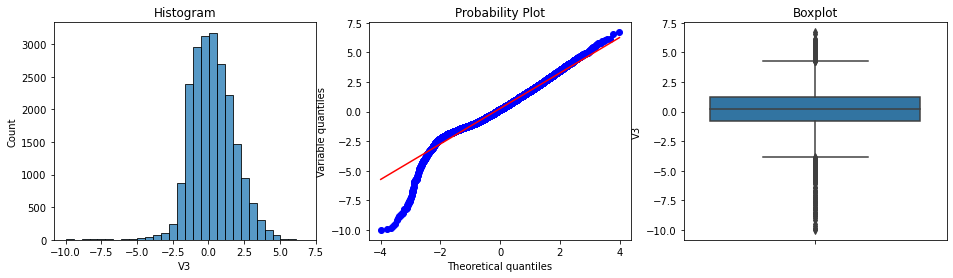

skewness of V3 is -0.06


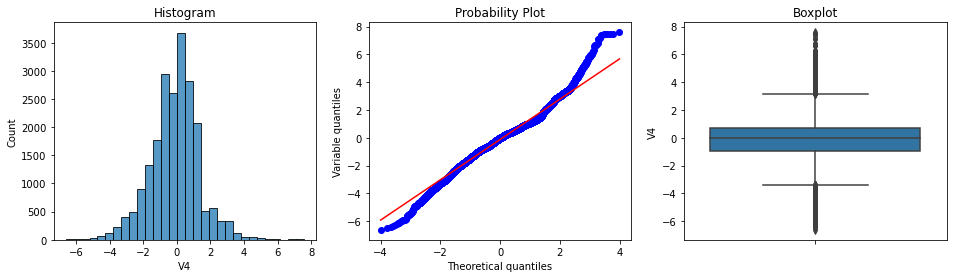

skewness of V4 is 0.00


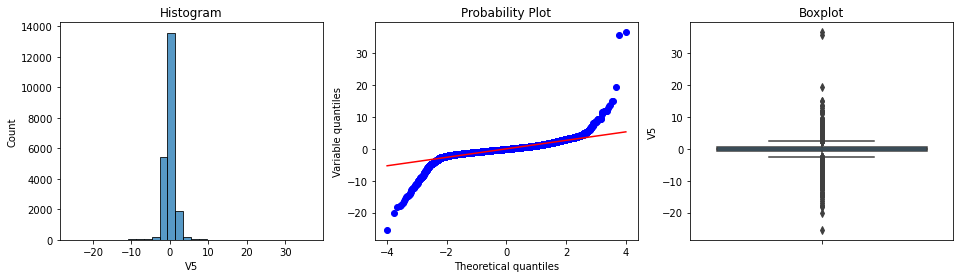

skewness of V5 is 0.42


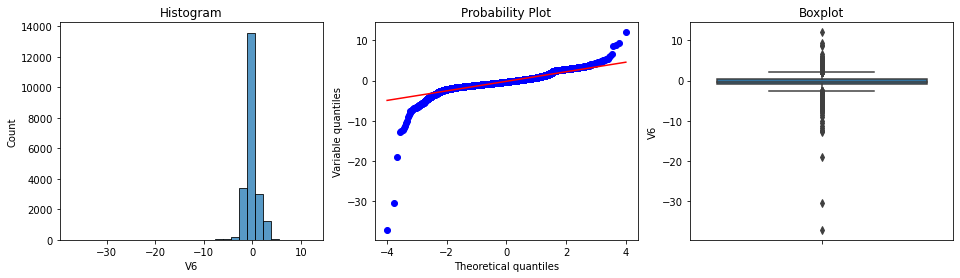

skewness of V6 is -1.77


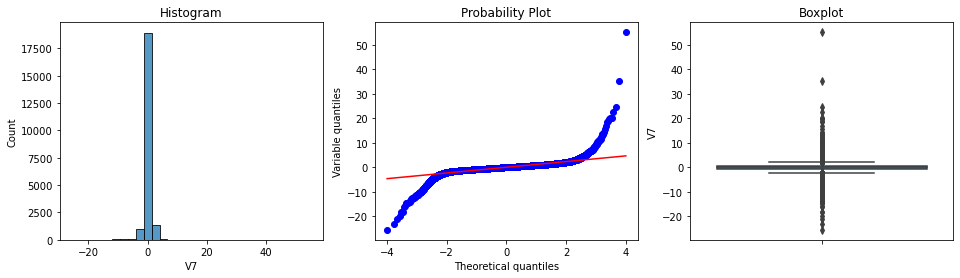

skewness of V7 is 2.50


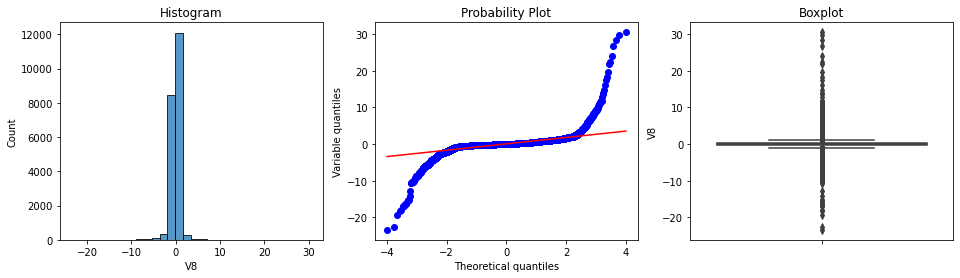

skewness of V8 is 2.05


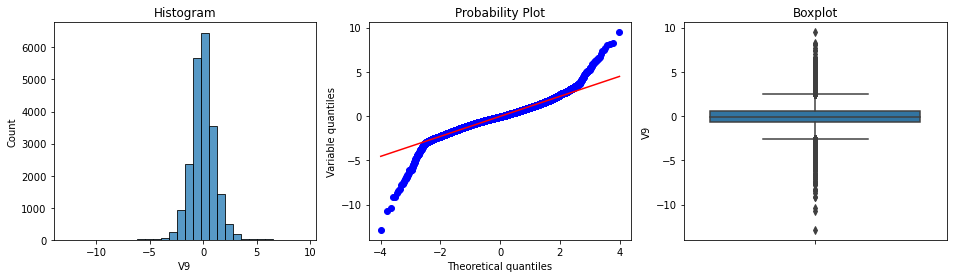

skewness of V9 is -0.11


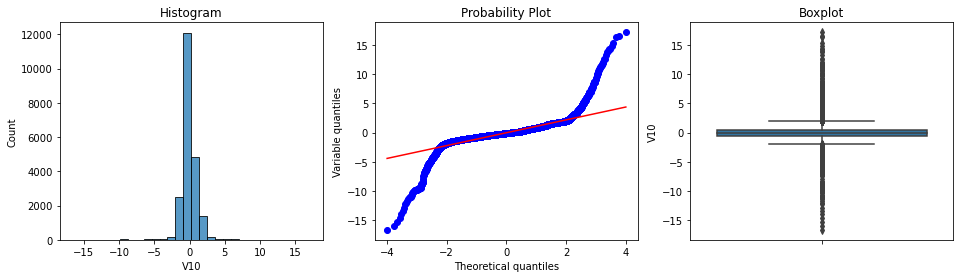

skewness of V10 is 0.17


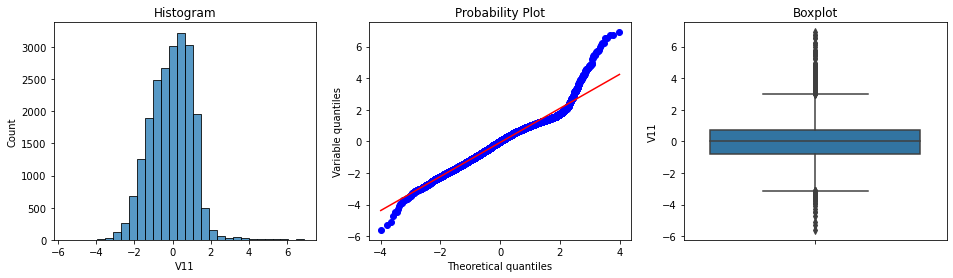

skewness of V11 is 0.09


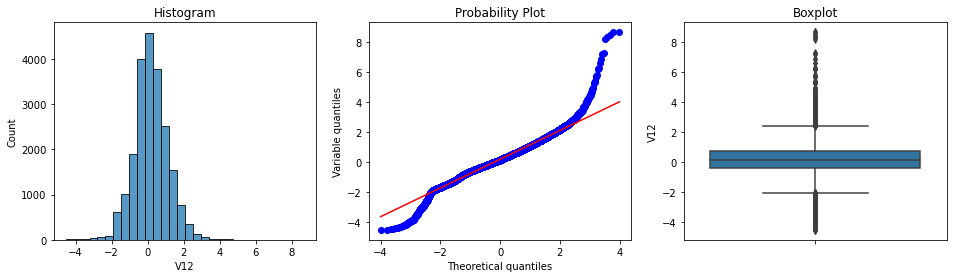

skewness of V12 is 0.25


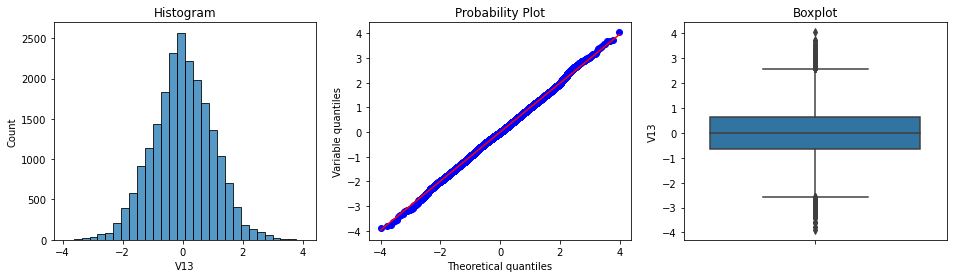

skewness of V13 is 0.00


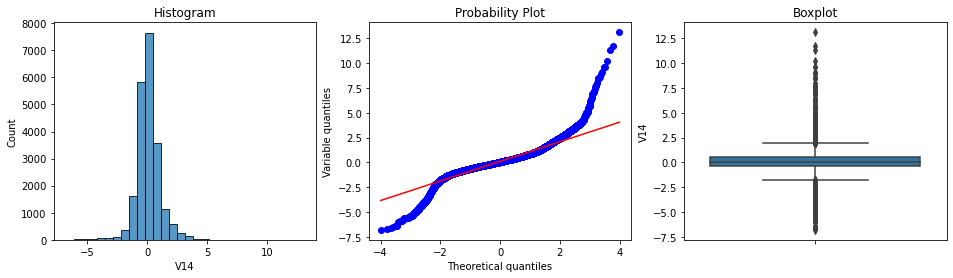

skewness of V14 is 0.46


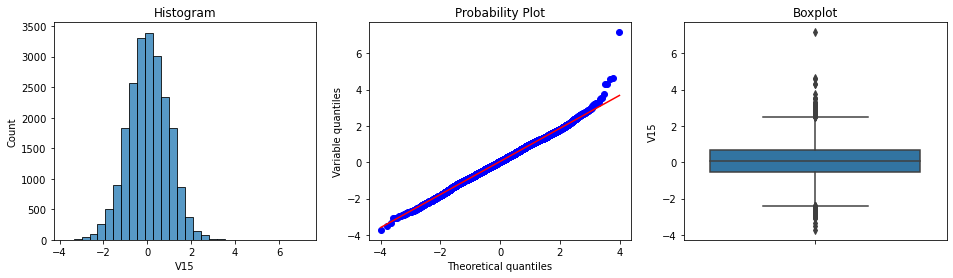

skewness of V15 is 0.01


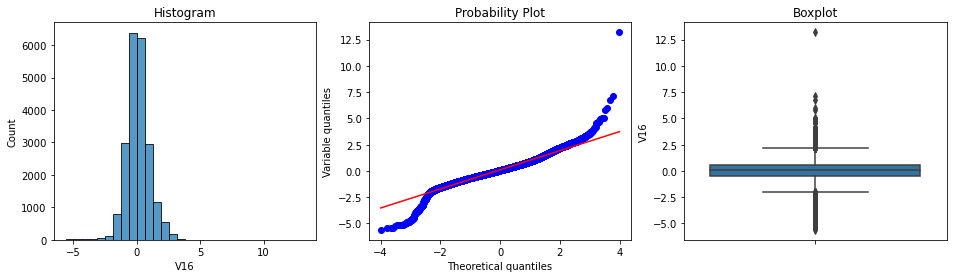

skewness of V16 is 0.15


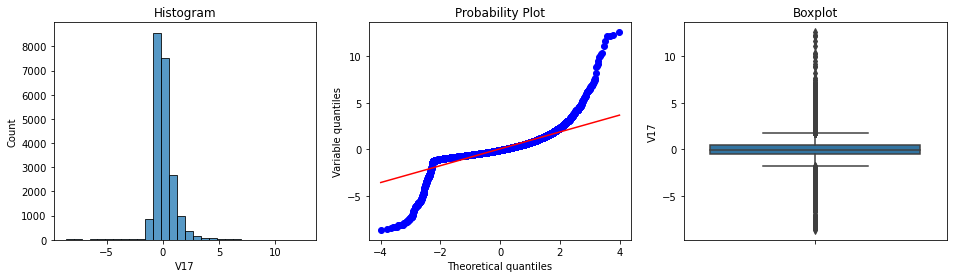

skewness of V17 is 0.47


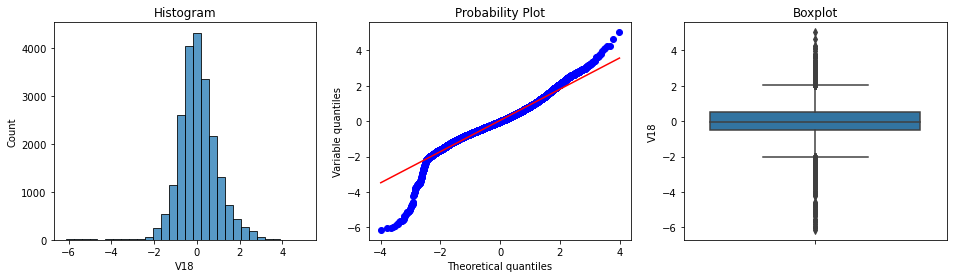

skewness of V18 is -0.07


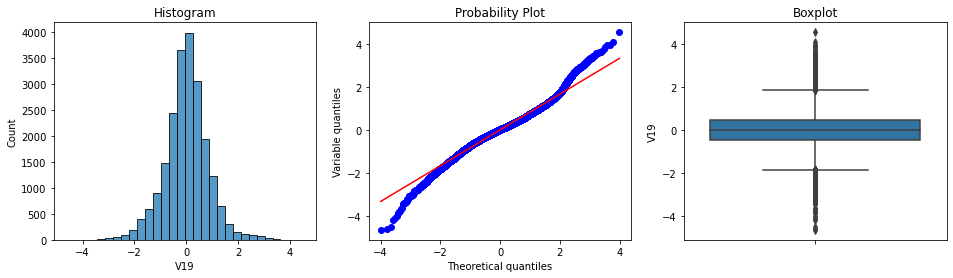

skewness of V19 is 0.02


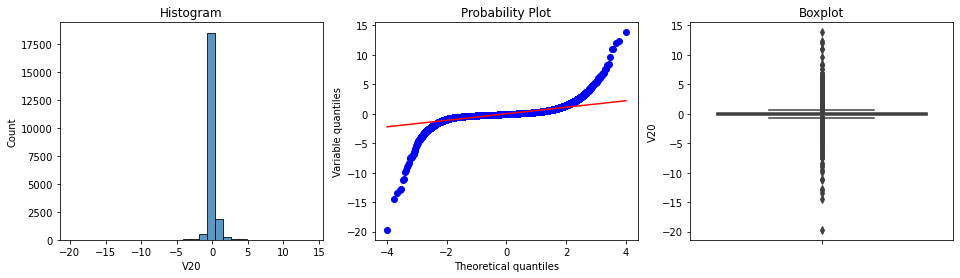

skewness of V20 is -0.84


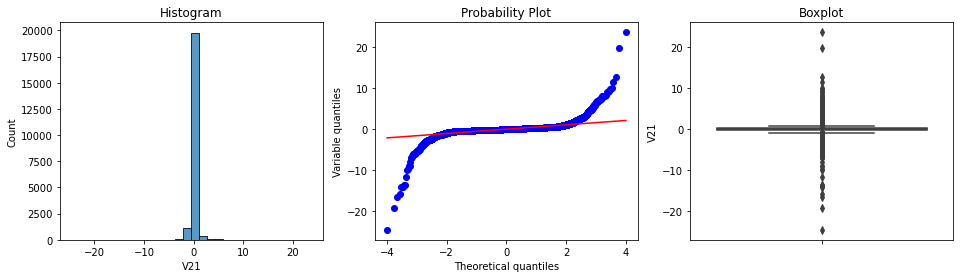

skewness of V21 is -0.98


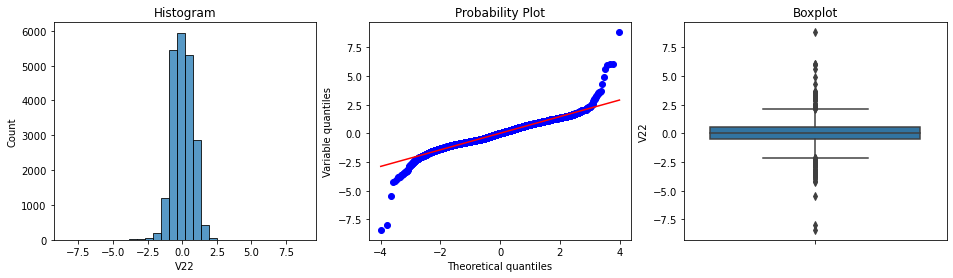

skewness of V22 is -0.01


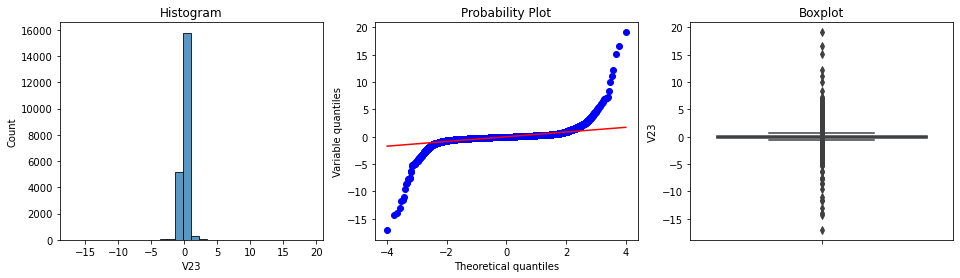

skewness of V23 is 0.53


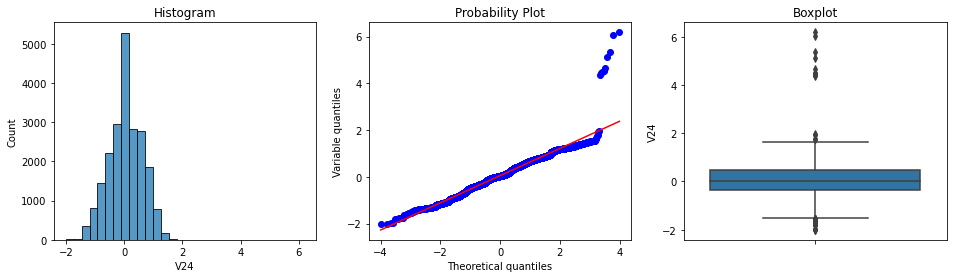

skewness of V24 is 0.11


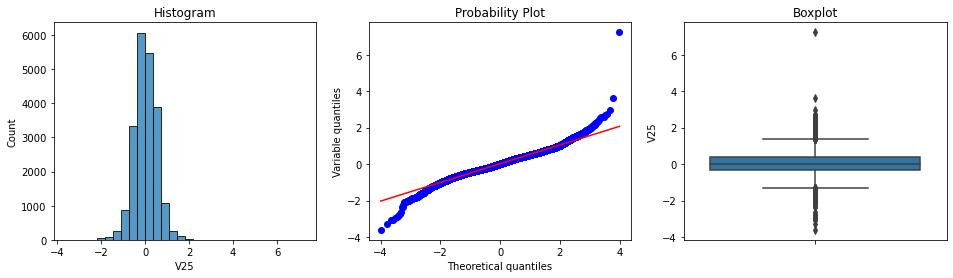

skewness of V25 is 0.07


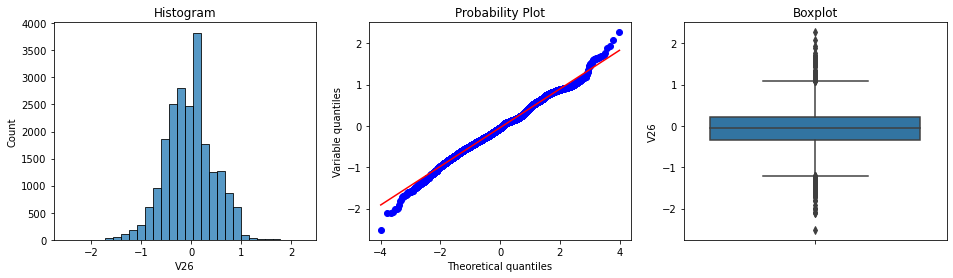

skewness of V26 is -0.02


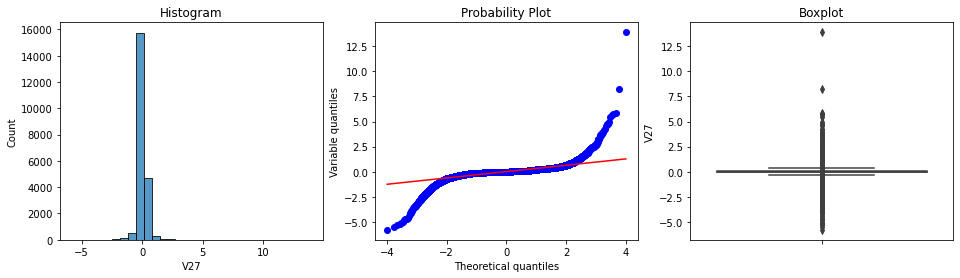

skewness of V27 is 1.52


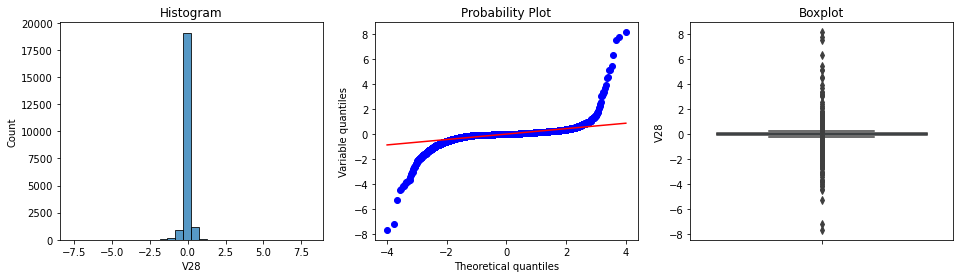

skewness of V28 is 0.41


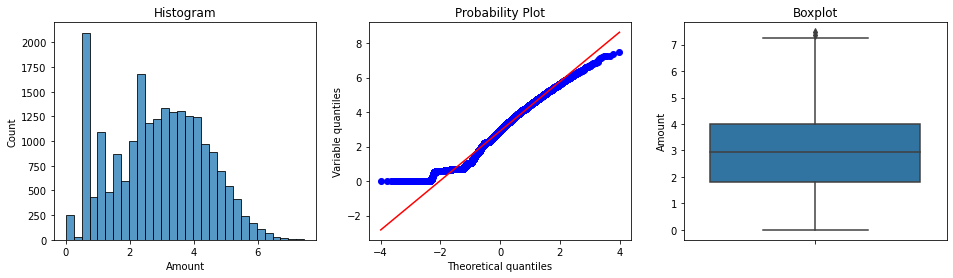

skewness of Amount is 0.02


In [21]:
# plotting the continuous variables after the Yeo-Johnson transformation
for variable in cont_vars:
    diagnostic_plots(tmp, variable)
    # printing skewness
    skewness = tmp[variable].skew()
    print("skewness of", variable, "is {:.2f}".format(skewness))

The Yeo-Johnson transformation improved the distributions